In [1]:
import numpy as np
import math,struct,pickle
from pathlib import Path
import matplotlib.pyplot as plt

In [2]:
def tanh(x):
    return np.tanh(x)
def softmax(x):
    exp=np.exp(x-x.max())
    return exp/exp.sum()

In [3]:
dimensions=[28*28,10]
activation=[tanh,softmax]
distribution=[
    {'b':[0,0]},
    {'b':[0,0],'w':[-math.sqrt(6/(dimensions[0]+dimensions[1])),math.sqrt(6/(dimensions[0]+dimensions[1]))]},
]

In [4]:
def init_parameters_b(layer):
    dist=distribution[layer]['b']
    return np.random.rand(dimensions[layer])*(dist[1]-dist[0])+dist[0]
def init_parameters_w(layer):
    dist=distribution[layer]['w']
    return np.random.rand(dimensions[layer-1],dimensions[layer])*(dist[1]-dist[0])+dist[0]
def init_parameters():
    parameter=[]
    for i in range(len(distribution)):
        layer_parameter={}
        for j in distribution[i].keys():
            if j=='b':
                layer_parameter['b']=init_parameters_b(i)
                continue
            if j=='w':
                layer_parameter['w']=init_parameters_w(i)
                continue
        parameter.append(layer_parameter)
    return parameter

In [5]:
parameters=init_parameters()

In [6]:
def predict(img,parameters):
    l0_in=img+parameters[0]['b']
    l0_out=activation[0](l0_in)
    l1_in=np.dot(l0_out,parameters[1]['w'])+parameters[1]['b']
    l1_out=activation[1](l1_in)
    return l1_out

In [7]:
predict(np.random.rand(784),parameters).argmax()

0

In [8]:
test_img=[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.01171875, 0.0703125, 0.0703125, 0.0703125, 0.4921875, 0.53125, 0.68359375, 0.1015625, 0.6484375, 0.99609375, 0.96484375, 0.49609375, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.1171875, 0.140625, 0.3671875, 0.6015625, 0.6640625, 0.98828125, 0.98828125, 0.98828125, 0.98828125, 0.98828125, 0.87890625, 0.671875, 0.98828125, 0.9453125, 0.76171875, 0.25, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.19140625, 0.9296875, 0.98828125, 0.98828125, 0.98828125, 0.98828125, 0.98828125, 0.98828125, 0.98828125, 0.98828125, 0.98046875, 0.36328125, 0.3203125, 0.3203125, 0.21875, 0.15234375, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0703125, 0.85546875, 0.98828125, 0.98828125, 0.98828125, 0.98828125, 0.98828125, 0.7734375, 0.7109375, 0.96484375, 0.94140625, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.3125, 0.609375, 0.41796875, 0.98828125, 0.98828125, 0.80078125, 0.04296875, 0.0, 0.16796875, 0.6015625, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0546875, 0.00390625, 0.6015625, 0.98828125, 0.3515625, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.54296875, 0.98828125, 0.7421875, 0.0078125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.04296875, 0.7421875, 0.98828125, 0.2734375, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.13671875, 0.94140625, 0.87890625, 0.625, 0.421875, 0.00390625, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.31640625, 0.9375, 0.98828125, 0.98828125, 0.46484375, 0.09765625, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.17578125, 0.7265625, 0.98828125, 0.98828125, 0.5859375, 0.10546875, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0625, 0.36328125, 0.984375, 0.98828125, 0.73046875, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.97265625, 0.98828125, 0.97265625, 0.25, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.1796875, 0.5078125, 0.71484375, 0.98828125, 0.98828125, 0.80859375, 0.0078125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.15234375, 0.578125, 0.89453125, 0.98828125, 0.98828125, 0.98828125, 0.9765625, 0.7109375, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.09375, 0.4453125, 0.86328125, 0.98828125, 0.98828125, 0.98828125, 0.98828125, 0.78515625, 0.3046875, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.08984375, 0.2578125, 0.83203125, 0.98828125, 0.98828125, 0.98828125, 0.98828125, 0.7734375, 0.31640625, 0.0078125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0703125, 0.66796875, 0.85546875, 0.98828125, 0.98828125, 0.98828125, 0.98828125, 0.76171875, 0.3125, 0.03515625, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.21484375, 0.671875, 0.8828125, 0.98828125, 0.98828125, 0.98828125, 0.98828125, 0.953125, 0.51953125, 0.04296875, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.53125, 0.98828125, 0.98828125, 0.98828125, 0.828125, 0.52734375, 0.515625, 0.0625, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0]

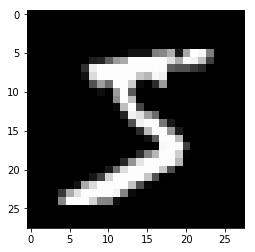

In [9]:
import matplotlib.pyplot as plt
im = np.reshape(test_img,(28,28))
plt.imshow(im , cmap='gray')

In [10]:
path='model_02.pkl'
with open(path,'rb') as f:
    parameters=pickle.load(f)

In [11]:
predict(np.array(test_img),parameters).argmax()

5

In [12]:
parameters

[{'b': array([-1.22268644e-02, -1.69337185e-02, -1.55384097e-02, -3.15686490e-02,
          1.10621898e-02,  5.53598326e-03, -6.35943805e-03, -5.84399455e-03,
          8.42867360e-03,  5.93783115e-03, -1.56796413e-02, -5.56046295e-03,
         -1.58257714e-02, -2.08147441e-02,  4.14084064e-03, -3.30956987e-03,
         -1.44388093e-02, -1.70634684e-02,  1.99394249e-04, -8.62252737e-03,
          2.74250602e-02, -1.00596961e-02, -3.61814817e-03,  2.21515384e-03,
          1.08541903e-02,  1.01123336e-02, -6.22160272e-03,  2.33535257e-02,
         -1.44424552e-02,  6.65463041e-03, -1.68420346e-02,  7.61633816e-04,
          4.15787745e-03,  5.26976593e-02,  1.05732735e-02, -7.68558429e-03,
         -3.49612494e-02,  5.01457301e-02, -2.15991903e-02,  2.41617243e-02,
          9.82514398e-03, -1.22803316e-03,  2.24658303e-02, -1.66578564e-02,
          1.14147401e-02, -2.75883366e-02,  1.08087783e-02,  2.57514564e-02,
         -2.37001587e-03,  4.03441970e-02, -1.53690019e-02,  3.20923099

In [13]:
dataset_path=Path('./MNIST')
train_img_path=dataset_path/'train-images.idx3-ubyte'
train_lab_path=dataset_path/'train-labels.idx1-ubyte'
test_img_path=dataset_path/'t10k-images.idx3-ubyte'
test_lab_path=dataset_path/'t10k-labels.idx1-ubyte'

In [14]:
train_num=50000
valid_num=10000
test_num=10000

with open(train_img_path,'rb') as f:
    struct.unpack('>4i',f.read(16))
    tmp_img=np.fromfile(f,dtype=np.uint8).reshape(-1,28*28)
    train_img=tmp_img[:train_num]
    valid_img=tmp_img[train_num:]
    
with open(test_img_path,'rb') as f:
    struct.unpack('>4i',f.read(16))
    test_img=np.fromfile(f,dtype=np.uint8).reshape(-1,28*28)

with open(train_lab_path,'rb') as f:
    struct.unpack('>2i',f.read(8))
    tmp_lab=np.fromfile(f,dtype=np.uint8)
    train_lab=tmp_lab[:train_num]
    valid_lab=tmp_lab[train_num:]
    
with open(test_lab_path,'rb') as f:
    struct.unpack('>2i',f.read(8))
    test_lab=np.fromfile(f,dtype=np.uint8)

In [15]:
def show_train(index):
    plt.imshow(train_img[index].reshape(28,28),cmap='gray')
    print('label : {}'.format(train_lab[index]))
def show_valid(index):
    plt.imshow(valid_img[index].reshape(28,28),cmap='gray')
    print('label : {}'.format(valid_lab[index]))
def show_test(index):
    plt.imshow(test_img[index].reshape(28,28),cmap='gray')
    print('label : {}'.format(test_lab[index]))

label : 9


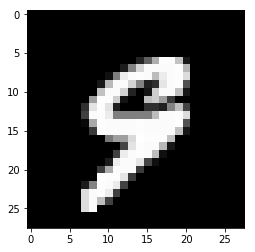

In [16]:
show_train(np.random.randint(train_num))

label : 8


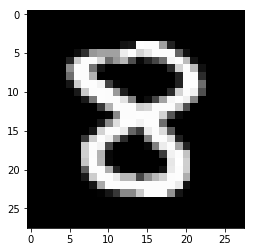

In [17]:
show_valid(np.random.randint(valid_num))

label : 9


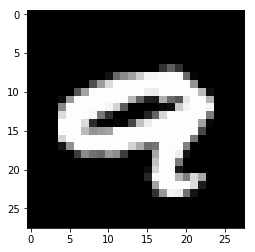

In [18]:
show_test(np.random.randint(test_num))